## Ejercicio NLP & WebScraping

1. Hacer web scraping para obtener todos los diálogos de cada capítulo de la serie.
2. Unificar los textos de cada capítulo en uno solo.
3. Separar los diálogos por personaje (Sheldon, Leonard, Penny, Raj, Howard, Amy). 
4. Tokenizar cada dialogo por personaje. 
5. Eliminar stopwords y signos de puntuación (. , : ; ¡ ¿ ? …) de las listas con tokens.
6. Encontrar la riqueza léxica de cada personaje.
7. Encontrar las 5 palabras más utilizadas por cada personaje.
8. Encontrar palabras similares para la palabra más utilizada de cada personaje.
9. Encontrar hápax de cada personaje.
10. Mostrar en una gráfica las 20 palabras que más se utilizan.
11. Analizar los sentimientos de los personajes

En primer lugar definimos todas las librerías que vamos a utilizar.

In [1]:
import requests
from bs4 import BeautifulSoup

import os
import re
import csv

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
from nltk import FreqDist

import string

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import time

### 1. Extraemos los textos

In [2]:
#Identificamos la carpeta donde se guardarán los archivos de texto de los diálogos
carpeta_destino = "Ejercicio_TBBT"

#Definimos una función para extraer y guardar el contenido de los capítulos
def scrapping(url, capitulo):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    entrytext = soup.find("div", class_="entrytext")
    
    if entrytext:
        parrafos = entrytext.find_all("p")
        dialogo = "\n".join([p.text for p in parrafos])
        
        archivo = f"Capitulo_{capitulo}.txt"
        ruta_archivo = os.path.join(carpeta_destino, archivo)
        
        with open(ruta_archivo, "w", encoding="utf-8") as file: #Guardamos el diálogo en un archivo de texto
            file.write(dialogo)
        print(f"Capítulo {capitulo} guardado en {archivo}")
    else:
        print(f"No se pudo encontrar el contenido en {url}")

In [3]:
#URL de la página sobre la que trabajar
url = "https://bigbangtrans.wordpress.com/series-1-episode-1-pilot-episode/"

#Realizamos la solicitud a la URL y comprobamos si fue exitosa
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    
    #Previamente hemos analizado la página y ubicado dónde están los elementos que buscamos, como el div con id "sidebar"
    sidebar = soup.find(id="sidebar")
    
    #Localizamos las etiquetas <li> dentro de "sidebar"
    etiquetas_li = sidebar.find_all("li")
    
    #Establecemos una lista para almacenar las URLs
    urls = []
    
    #Recorremos las etiquetas <li> y extraemos las URLs
    for etiqueta_li in etiquetas_li:
        #Ignoramos la etiqueta con el nombre "About", puesto que no tiene nada de interés.
        if "About" not in etiqueta_li.text:
            # Obtener la URL del atributo "href"
            url = etiqueta_li.find("a")["href"]
            urls.append(url)
    
    #Creamos un dataframe de pandas con las URLs
    df = pd.DataFrame(urls, columns=["URLs"])
    
    #Lo guardamos en un archivo CSV
    df.to_csv("Ejercicio_TBBT/urls_TBBT.csv", index=False)
    
    print("URLs extraídas y guardadas en 'urls_TBBT.csv'.")
else:
    print("No se pudo acceder a la página web.")

URLs extraídas y guardadas en 'urls_TBBT.csv'.


In [4]:
df = pd.read_csv("Ejercicio_TBBT/urls_TBBT.csv")

#Identificamos la carpeta donde se guardarán los archivos de texto de los diálogos
carpeta_destino = "Ejercicio_TBBT"

In [5]:
lista = df.values.tolist()

lista_plana = []

for sublist in lista:
    lista_plana.extend(sublist)

In [6]:
urls = lista_plana

In [7]:
#Iteramos a través de las URLs para extraer los diálogos
for i, url in enumerate(urls, start=1):
    scrapping(url, i)

Capítulo 1 guardado en Capitulo_1.txt
Capítulo 2 guardado en Capitulo_2.txt
Capítulo 3 guardado en Capitulo_3.txt
Capítulo 4 guardado en Capitulo_4.txt
Capítulo 5 guardado en Capitulo_5.txt
Capítulo 6 guardado en Capitulo_6.txt
Capítulo 7 guardado en Capitulo_7.txt
Capítulo 8 guardado en Capitulo_8.txt
Capítulo 9 guardado en Capitulo_9.txt
Capítulo 10 guardado en Capitulo_10.txt
Capítulo 11 guardado en Capitulo_11.txt
Capítulo 12 guardado en Capitulo_12.txt
Capítulo 13 guardado en Capitulo_13.txt
Capítulo 14 guardado en Capitulo_14.txt
Capítulo 15 guardado en Capitulo_15.txt
Capítulo 16 guardado en Capitulo_16.txt
Capítulo 17 guardado en Capitulo_17.txt
Capítulo 18 guardado en Capitulo_18.txt
Capítulo 19 guardado en Capitulo_19.txt
Capítulo 20 guardado en Capitulo_20.txt
Capítulo 21 guardado en Capitulo_21.txt
Capítulo 22 guardado en Capitulo_22.txt
Capítulo 23 guardado en Capitulo_23.txt
Capítulo 24 guardado en Capitulo_24.txt
Capítulo 25 guardado en Capitulo_25.txt
Capítulo 26 guarda

### 2. Unificar los textos

In [8]:
textos = []

for i in range(1, 232):
    archivo = f"Ejercicio_TBBT/Capitulo_{i}.txt"
    try:
        with open(archivo, "r", encoding="utf-8") as file:
            texto_capitulo = file.read()
            textos.append(texto_capitulo)
    except FileNotFoundError:
        print(f"El archivo {archivo} no se encontró.")

texto_unico = "\n\n".join(textos)

archivo_unico = f"Ejercicio_TBBT/Capitulos_totales.txt"
with open(archivo_unico, "w", encoding="utf-8") as file:
    file.write(texto_unico)

print(f"Los textos se han unido en {archivo_unico}")

Los textos se han unido en Ejercicio_TBBT/Capitulos_totales.txt


In [9]:
archivo_unico = "Ejercicio_TBBT/Capitulos_totales.txt"

with open(archivo_unico, "r", encoding="utf-8") as file:
    texto_unificado = file.read()

texto_sin_parentesis = re.sub(r'\([^)]*\)', '', texto_unificado)

### 3. Separar los diálogos

In [10]:
#Dividimos los diálogos por líneas
lineas = texto_sin_parentesis.split('\n')

#Inicializamos un diccionario para almacenar los diálogos por cada personaje
dialogos_por_personaje = {}

#Recorremos las líneas y separamos los diálogos por personaje. Para ello indicamos que ":" es el indicativo en cada línea de quién es el personaje
personaje_actual = None
for linea in lineas:
    if ":" in linea:
        partes = linea.split(":")
        personaje_actual = partes[0].strip()
        dialogo = ":".join(partes[1:]).strip()
        if personaje_actual in dialogos_por_personaje:
            dialogos_por_personaje[personaje_actual].append(dialogo)
        else:
            dialogos_por_personaje[personaje_actual] = [dialogo]
    elif personaje_actual is not None:
        dialogos_por_personaje[personaje_actual][-1] += f"\n{linea.strip()}"

In [11]:
personajes_permitidos = ["Sheldon", "Leonard", "Penny", "Raj", "Howard", "Amy", "Stuart"]

#Creamos un nuevo diccionario con los personajes permitidos exclusivamente
dialogos_filtrados = {key: value for key, value in dialogos_por_personaje.items() if key in personajes_permitidos}

### 4. Tokenizar los diálogos

In [12]:
#El símbolo "’" en los textos nos va a dar problemas, así que lo reemplazamos por "'"
for personaje, dialogos in dialogos_filtrados.items():
    dialogos_filtrados[personaje] = [dialogo.replace("’", "'") for dialogo in dialogos]

#Creamos un nuevo diccionario para los diálogos tokenizados
dialogos_tokenizados = {}

#Tokenizamos los diálogos de cada personaje
for personaje, dialogos in dialogos_filtrados.items():
    dialogos_tokenizados[personaje] = [word_tokenize(dialogo, language='english') for dialogo in dialogos]

### 5. Eliminar stepwords y signos

In [14]:
#Obtenemos las stopwords y la lista de signos de puntuación
stopwords = nltk.corpus.stopwords.words("english")
punctuation = [".", ",", ":", ";", "!", "?", "…"]

#Agregamos las conjunciones y exclamaciones a la lista de palabras a eliminar
exclamations = ["ah", "eh", "oh", "uh"]

# Unir todas las palabras a eliminar en una lista
words_to_remove = stopwords + punctuation + exclamations

# Definir la función para limpiar los tokens de un texto
def limpiar_tokens(tokens):
    tokens_limpios = [token for token in tokens if token.lower() not in words_to_remove]
    return tokens_limpios

In [15]:
#"Limpiamos" los tokens de todos los diálogos en un nuevo diccionario
dialogos_tokenizados_limpios = {}
for personaje, tokens_dialogo in dialogos_tokenizados.items():
    dialogos_limpios = [limpiar_tokens(tokens) for tokens in tokens_dialogo]
    dialogos_tokenizados_limpios[personaje] = dialogos_limpios

#Como hemos visto que las palabras con apóstrofes no se han quitado, creamos una función para eliminarlas
def eliminar_palabras_con_apostrofe(dialogos_tokenizados):
    dialogos_sap = {}
    for personaje, dialogos in dialogos_tokenizados.items():
        dialogos_sap[personaje] = [
            [palabra for palabra in dialogo if "'" not in palabra] # Filtramos palabras sin apóstrofes
            for dialogo in dialogos
        ]
    return dialogos_sap

# Aplicamos la función
dialogos_limpios = eliminar_palabras_con_apostrofe(dialogos_tokenizados_limpios)

### 6. Encontrar riqueza léxica

In [16]:
#Creamos un diccionario para almacenar la riqueza léxica de cada personaje
riqueza_lexica = {}

#Calculamos la riqueza léxica para cada personaje
for personaje, dialogo in dialogos_limpios.items():
    #Obtenemos una lista de todas las palabras en los diálogos del personaje
    palabras_totales = [palabra for frase in dialogo for palabra in frase]
    #Calculamos el número de palabras únicas
    palabras_unicas = set(palabras_totales)
    # Calculamos la riqueza léxica dividiendo el número de palabras únicas entre el número total de palabras
    riqueza = len(palabras_unicas) / len(palabras_totales)
    riqueza_lexica[personaje] = riqueza

#Mostramos la riqueza léxica de cada personaje
for personaje, riqueza in riqueza_lexica.items():
    print(f"Riqueza léxica de {personaje}: {riqueza:.2f}")

Riqueza léxica de Sheldon: 0.19
Riqueza léxica de Leonard: 0.18
Riqueza léxica de Penny: 0.16
Riqueza léxica de Howard: 0.23
Riqueza léxica de Raj: 0.25
Riqueza léxica de Stuart: 0.42
Riqueza léxica de Amy: 0.29


### 7. Encontrar 3 palabras más utilizadas

In [17]:
#Creamos un diccionario para almacenar las 3 palabras más utilizadas por cada personaje
palabras_mas_utilizadas = {}

#Buscamos las 3 palabras más utilizadas
for personaje, dialogo in dialogos_limpios.items():
    # Obtener una lista plana de todas las palabras en los diálogos del personaje
    palabras_totales = [palabra for frase in dialogo for palabra in frase]
    #Contamos la frecuencia de cada palabra
    frecuencia_palabras = Counter(palabras_totales)
    #Obtenemos las 3 más utilizadas
    palabras_top = frecuencia_palabras.most_common(3)
    palabras_mas_utilizadas[personaje] = palabras_top

#Mostramos las 3 más utilizadas
for personaje, palabras_top in palabras_mas_utilizadas.items():
    print(f"Las 3 palabras más utilizadas de {personaje}:")
    for palabra, frecuencia in palabras_top:
        print(f"{palabra}: {frecuencia} veces")
    print()

Las 3 palabras más utilizadas de Sheldon:
know: 823 veces
Leonard: 759 veces
Well: 694 veces

Las 3 palabras más utilizadas de Leonard:
know: 641 veces
Sheldon: 590 veces
Yeah: 424 veces

Las 3 palabras más utilizadas de Penny:
know: 719 veces
Okay: 616 veces
Yeah: 498 veces

Las 3 palabras más utilizadas de Howard:
know: 388 veces
like: 301 veces
get: 259 veces

Las 3 palabras más utilizadas de Raj:
like: 349 veces
know: 324 veces
Well: 195 veces

Las 3 palabras más utilizadas de Stuart:
know: 54 veces
Yeah: 36 veces
Hey: 35 veces

Las 3 palabras más utilizadas de Amy:
Sheldon: 361 veces
know: 244 veces
like: 188 veces



### 8. Encontrar similares a la más utilizada

In [18]:
#Creamos un diccionario para almacenar la palabra más utilizada por cada personaje
palabra_mas_utilizada = {}

#Localizamos la palabra más utilizada por cada personaje
for personaje, dialogos in dialogos_limpios.items():
    #Unimos todos los diálogos de un personaje en una lista única de palabras
    todas_las_palabras = [palabra for dialogo in dialogos for palabra in dialogo]  
    #Calculamos su frecuencia
    frecuencia_palabras = FreqDist(todas_las_palabras) 
    # Encontramos la más común
    palabra_mas_comun = frecuencia_palabras.most_common(1)[0][0]
    #La almacenamos en el diccionario
    palabra_mas_utilizada[personaje] = palabra_mas_comun

#Y la mostramos
for personaje, palabra in palabra_mas_utilizada.items():
    print(f"La palabra más utilizada por {personaje} es: {palabra}")

La palabra más utilizada por Sheldon es: know
La palabra más utilizada por Leonard es: know
La palabra más utilizada por Penny es: know
La palabra más utilizada por Howard es: know
La palabra más utilizada por Raj es: like
La palabra más utilizada por Stuart es: know
La palabra más utilizada por Amy es: Sheldon


In [19]:
#Convertimos el diccionario en una lista de tuplas
lista_palabras_mas_utilizadas = [(personaje, palabra) for personaje, palabra in palabra_mas_utilizada.items()]

#Creamos un diccionario nuevo para almacenar las similares
palabras_similares = {}

#Buscamos las "similares" para cada personaje (sabiendo que no son similares en cuanto a significado sino en contexto)
for personaje, palabra_mas_utilizada in lista_palabras_mas_utilizadas:
    #Convertimos los diálogos de cada personaje en una lista
    palabras_personaje = [palabra for dialogo in dialogos_limpios[personaje] for palabra in dialogo]   
    #Convertimos la lista en un objeto Text para así poder utilizar la función
    texto_personaje = nltk.text.ContextIndex(palabras_personaje)
    #Encontramos las similares utilizando la función similar_words()
    similares = texto_personaje.similar_words(palabra_mas_utilizada)    
    #Las almacenamos en el diccionario
    palabras_similares[personaje] = similares

#Las mostramos para cada personaje
for personaje, similares in palabras_similares.items():
    print(similares)

['Leonard', 'Penny', 'right', 'previously', 'want', 'Amy', 'ahead', 'must', 'sure', 'never', 'Crushers', 'looks', 'say', 'pass', 'else', 'talk', 'sick', 'think', 'going', 'everything']
['go', 'got', 'Yeah', 'good', 'Sheldon', 'think', 'well', 'hi', 'Penny', 'talk', 'yeah', 'right', 'need', 'come', 'say', 'Thank', 'would', 'like', 'guess', 'Well']
['let', 'well', 'Sheldon', 'good', 'Well', 'think', 'sorry', 'right', 'come', 'ca', 'yeah', 'Look', 'Let', 'look', 'want', 'okay', 'Okay', 'Hey', 'fine', 'like']
['like', 'Yeah', 'disgusted', 'talk', 'shops', 'ca', 'romantic', 'goblins', 'ring', 'ancestors', 'priority', 'Must', 'might', 'sound', 'say', 'hey', 'made', 'guys', 'bigger', 'baby']
['going', 'rather', 'poop', 'amazing', 'really', 'eyes', 'eye', 'Hey', 'Leonard', 'look', 'nice', 'back', 'wanted', 'beg', 'lovely', 'connection', 'bad', 'give', 'pretty', 'astrophysicist']
[]
['really', 'Fine', 'think', 'Okay', 'bestie', 'one', 'get', 'say', 'mean', 'Let', 'Yes', 'Well', 'ca', 'going', '

### 9. Encontrar hápax de cada personaje

In [20]:
#Creamos un diccionario nuevo para almacenar los hápax de cada personaje, que son palabras que solo utiliza una vez
hapax_por_personaje = {}

#Buscamos los hápax de cada personaje
for personaje, dialogos in dialogos_limpios.items():    
    #Buscamos los hápax
    hapax = [palabra for palabra, frecuencia in frecuencia_palabras.items() if frecuencia == 1] 
    #Los almacenamos en el diccionario
    hapax_por_personaje[personaje] = hapax

#Los mostramos por cada personaje
for personaje, hapax in hapax_por_personaje.items():
    print(f"Hapax para {personaje}:")
    print(hapax)

Hapax para Sheldon:
['unfamiliar', 'aversion', 'soiled', 'hosiery', 'concept', 'deity', 'baffled', 'attendance', 'Noted', 'Tepid', 'Neurobiologist', 'indicates…', 'Dandruff', 'scalp', 'flattered', 'factoid', 'silence', 'occasional', 'Foreman', 'Grill', 'seals', 'flavour', 'fat', 'Remarkable', 'Cultural', 'perceptions', 'subjective', 'slut', 'volunteering', 'electronically', 'centres', '128', 'rhinoceroses', 'domesticated', 'pets', 'wins', 'Second', 'Defend', 'Correct', 'Tuned', 'bayonets', 'postulate', 'alternate', 'differs', 'pose', 'giant', 'builds', 'dams', 'overlord', 'low-lying', 'city', 'Copenhagen', 'flooded', 'Thousands', 'Devastated', 'Danes', 'invent', 'namesake', 'pastry', 'kinder', 'suited', 'hiding', 'feminine', 'supplies', 'Subject', 'entropy', 'decay', 'eventual', 'establishment', 'efficiently', 'festival', 'humdrum', 'chitchat', 'master', 'degree', 'subtle', 'compared', 'real-world', 'outright', 'Babinski', 'Dirac', 'defecates', 'Clarke-Maxwell', 'mapping', 'neurologica

### 10. Gráfica de las 20 palabras más utilizadas

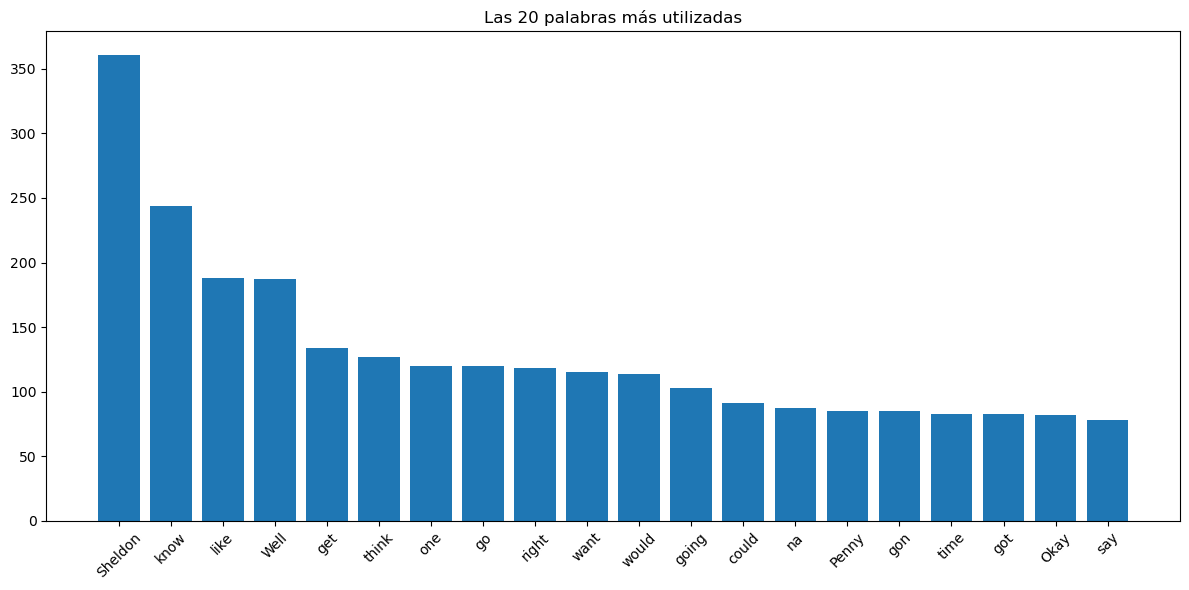

In [21]:
#Buscamos las 20 palabras más comunes
palabras_mas_comunes = frecuencia_palabras.most_common(20)

# Separamos las palabras y sus frecuencias en listas separadas
palabras, frecuencias = zip(*palabras_mas_comunes)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(palabras, frecuencias)
plt.title("Las 20 palabras más utilizadas")
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

### 11. Analizar sentimientos personaje

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Creamos un objeto para el análisis de sentimientos
sia = SentimentIntensityAnalyzer()

#Desarrollamos una función para obtener el sentimiento de un diálogo
def analizar_sentimiento(dialogos_limpios):
    sentimientos = {}
    for personaje, dialogos in dialogos_limpios.items():
        sentimiento_persona = []
        for dialogo in dialogos:
            texto_dialogo = ' '.join(dialogo)  # Convertir la lista de tokens a texto
            sentiment_score = sia.polarity_scores(texto_dialogo)
            sentimiento_persona.append(sentiment_score)
        sentimientos[personaje] = sentimiento_persona
    return sentimientos

In [28]:
sentimientos_personajes = analizar_sentimiento(dialogos_limpios)

def obtener_sentimiento_total(sentimientos_persona):
    sentimiento_total = {}
    for personaje, sentimientos in sentimientos_persona.items():
        sentimiento_total[personaje] = {
            'negativo': 0,
            'neutro': 0,
            'positivo': 0,
            'compound': 0,
            'cantidad_dialogos': len(sentimientos)  # Guardar la cantidad total de diálogos
        }
        for sentimiento in sentimientos:
            sentimiento_total[personaje]['negativo'] += sentimiento['neg']
            sentimiento_total[personaje]['neutro'] += sentimiento['neu']
            sentimiento_total[personaje]['positivo'] += sentimiento['pos']
            sentimiento_total[personaje]['compound'] += sentimiento['compound']
        
        # Calcular el promedio dividiendo por la cantidad de diálogos
        for key in sentimiento_total[personaje]:
            if key != 'cantidad_dialogos':
                sentimiento_total[personaje][key] /= sentimiento_total[personaje]['cantidad_dialogos']
    
    return sentimiento_total

In [29]:
sentimiento_total_personajes = obtener_sentimiento_total(sentimientos_personajes)

# Mostrar el sentimiento total de cada personaje
for personaje, sentimiento_total in sentimiento_total_personajes.items():
    print(f"Sentimiento total de {personaje}:")
    print(f"Negativo: {sentimiento_total['negativo']}")
    print(f"Neutro: {sentimiento_total['neutro']}")
    print(f"Positivo: {sentimiento_total['positivo']}")
    print(f"Compound: {sentimiento_total['compound']}")
    print(f"Cantidad de diálogos: {sentimiento_total['cantidad_dialogos']}")
    print("-----------------------------")

Sentimiento total de Sheldon:
Negativo: 0.09369702457956007
Neutro: 0.6589104786545936
Positivo: 0.22212074169900958
Compound: 0.14106618369987128
Cantidad de diálogos: 11595
-----------------------------
Sentimiento total de Leonard:
Negativo: 0.08211992562751806
Neutro: 0.6155697758496023
Positivo: 0.2500432806528258
Compound: 0.1304682264228908
Cantidad de diálogos: 9681
-----------------------------
Sentimiento total de Penny:
Negativo: 0.08589071251791058
Neutro: 0.5743923407581091
Positivo: 0.28982766705744406
Compound: 0.15662351178846046
Cantidad de diálogos: 7677
-----------------------------
Sentimiento total de Howard:
Negativo: 0.08383396097226986
Neutro: 0.6456194796302611
Positivo: 0.23322834645669302
Compound: 0.13016858952413568
Cantidad de diálogos: 5842
-----------------------------
Sentimiento total de Raj:
Negativo: 0.08657232027550586
Neutro: 0.6274431769263857
Positivo: 0.2515469220835123
Compound: 0.15448960396039613
Cantidad de diálogos: 4646
-------------------

Lo que podemos observar es que a pesar de cómo están definidos los personajes, el tipo medio medio de las expresiones es bastante neutro por regla general